In [2]:
%matplotlib notebook

from matplotlib import pyplot as plt

In [3]:
from reachy_sdk import ReachySDK

In [4]:
reachy = ReachySDK(host='192.168.1.46')

In [6]:
reachy.turn_on('l_arm')

### Using the thread version

<IPython.core.display.Javascript object>


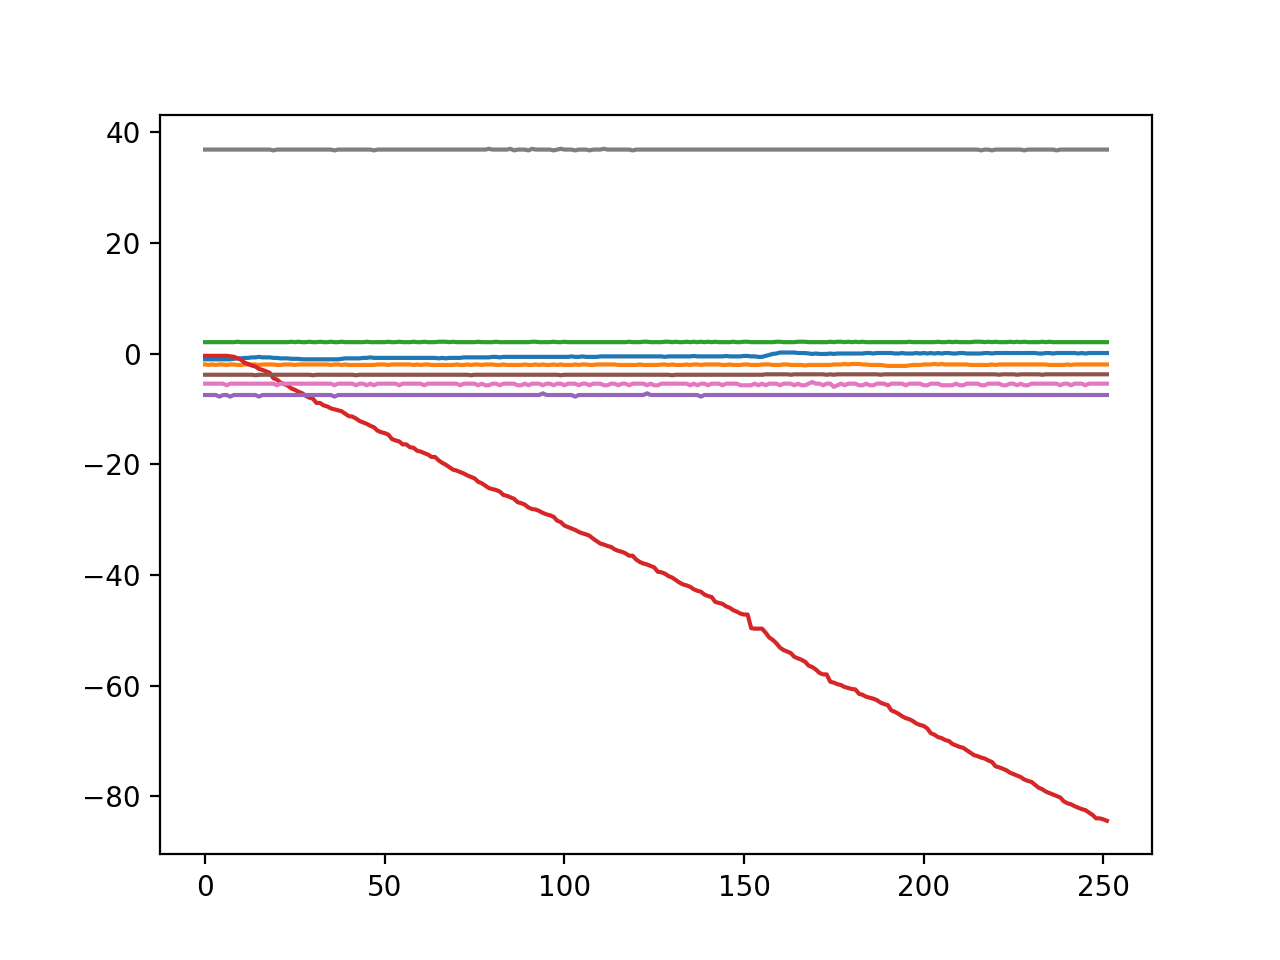

In [11]:
from reachy_sdk.trajectory import goto

import time
from threading import Thread

running = True
data = []

def record():
    while running:
        data.append([
            j.present_position
            for j in reachy.l_arm.joints.values()
        ])
        time.sleep(0.01)
    
t = Thread(target=record)
t.start()
    
goto({reachy.l_arm.l_elbow_pitch: -90}, duration=3)
running = False
t.join()

plt.figure()
plt.plot(data)

### Using the async version

<IPython.core.display.Javascript object>


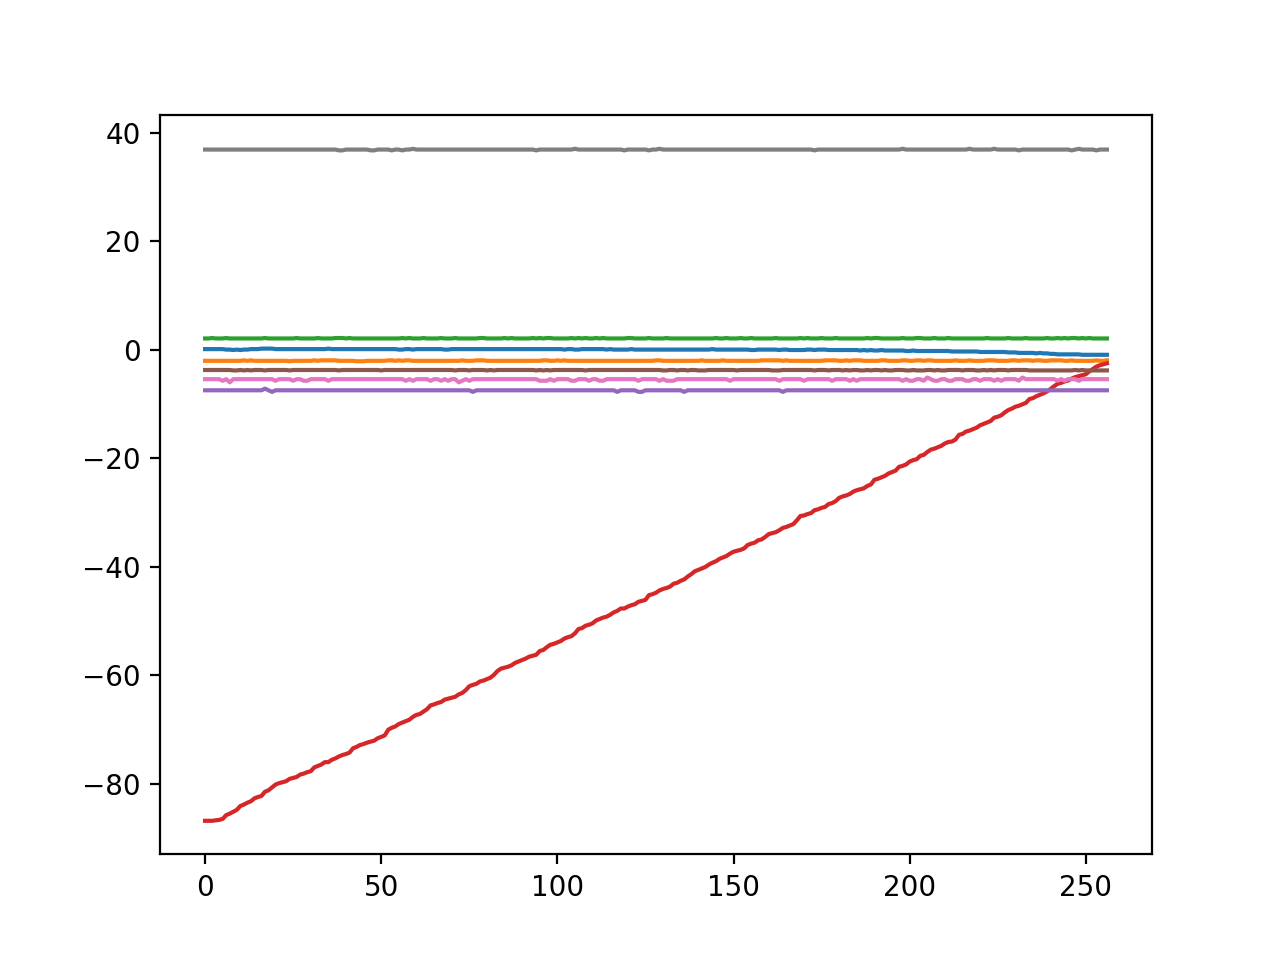

In [12]:
import asyncio

from reachy_sdk.trajectory import goto_async

running = [True]
data = []

async def rec():
    while running[0]:
        data.append([
            j.present_position
            for j in reachy.l_arm.joints.values()
        ])
        await asyncio.sleep(0.01)
    
async def play():
    await goto_async({reachy.l_arm.l_elbow_pitch: 0}, duration=3)
    running[0] = False

await asyncio.gather(
    play(),
    rec(),
)
    
plt.figure()
plt.plot(data)

In [13]:
reachy.turn_off('l_arm')